In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set_palette('viridis')
pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv('creditcard.csv ')

# Dataset overview
print("Dataset Overview:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()

Dataset Overview:
Rows: 284807, Columns: 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### Exploratory Data Analysis (EDA)


In [6]:
# Missing values check
missing_data = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Missing %': round((df.isnull().sum() / df.shape[0]) * 100, 2)
})
print("\nMissing Data Summary:")
print(missing_data)



Missing Data Summary:
       Data Type  Missing Values  Missing %
Time     float64               0        0.0
V1       float64               0        0.0
V2       float64               0        0.0
V3       float64               0        0.0
V4       float64               0        0.0
V5       float64               0        0.0
V6       float64               0        0.0
V7       float64               0        0.0
V8       float64               0        0.0
V9       float64               0        0.0
V10      float64               0        0.0
V11      float64               0        0.0
V12      float64               0        0.0
V13      float64               0        0.0
V14      float64               0        0.0
V15      float64               0        0.0
V16      float64               0        0.0
V17      float64               0        0.0
V18      float64               0        0.0
V19      float64               0        0.0
V20      float64               0        0.0
V21      

In [7]:
# Class distribution
class_counts = df['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)
print(f"Fraudulent %: {100 * class_counts[1] / class_counts.sum():.4f}%")


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64
Fraudulent %: 0.1727%


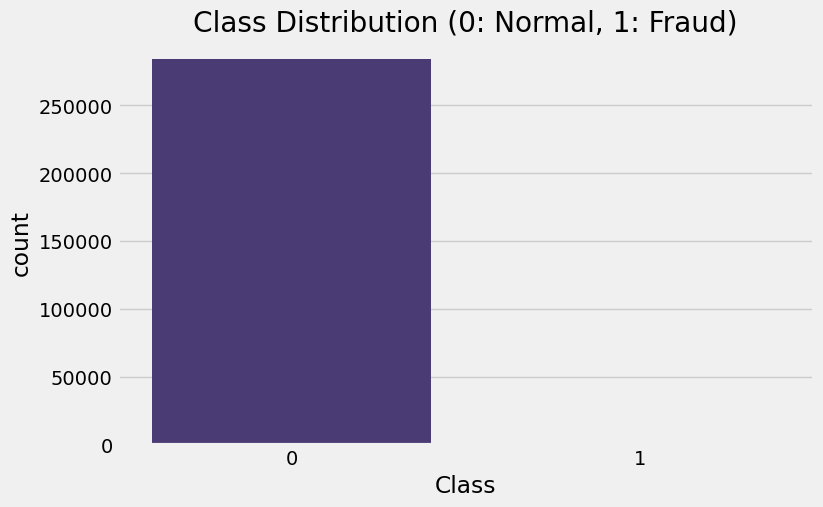

In [8]:
# Plotting class imbalance
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.show()

In [9]:
# Amount and Time summary
print("\nStatistical Summary of Amount and Time:")
print(df[['Time', 'Amount']].describe())


Statistical Summary of Amount and Time:
                Time         Amount
count  284807.000000  284807.000000
mean    94813.859575      88.349619
std     47488.145955     250.120109
min         0.000000       0.000000
25%     54201.500000       5.600000
50%     84692.000000      22.000000
75%    139320.500000      77.165000
max    172792.000000   25691.160000


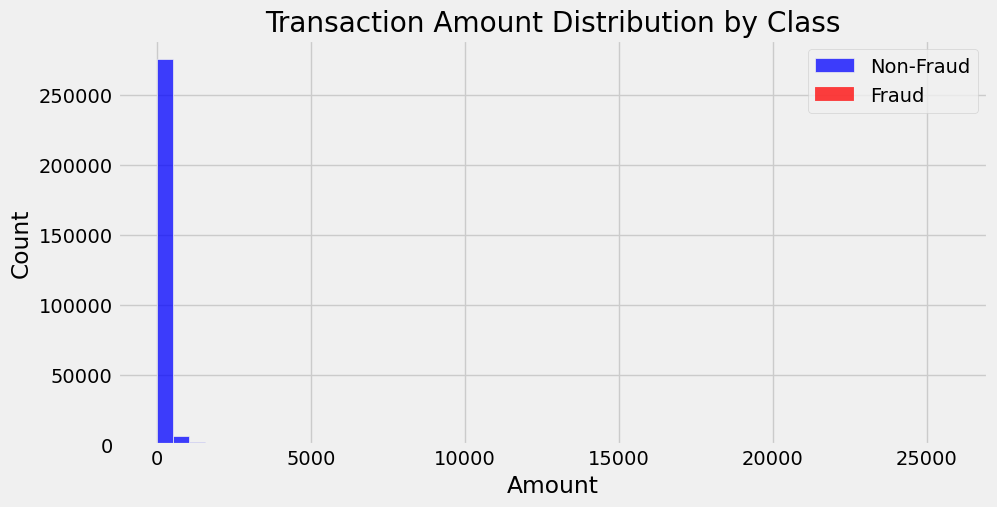

In [10]:
# Histogram: Amount
plt.figure(figsize=(10, 5))
sns.histplot(df[df.Class == 0]['Amount'], bins=50, color='blue', label='Non-Fraud')
sns.histplot(df[df.Class == 1]['Amount'], bins=50, color='red', label='Fraud')
plt.legend()
plt.title('Transaction Amount Distribution by Class')
plt.show()


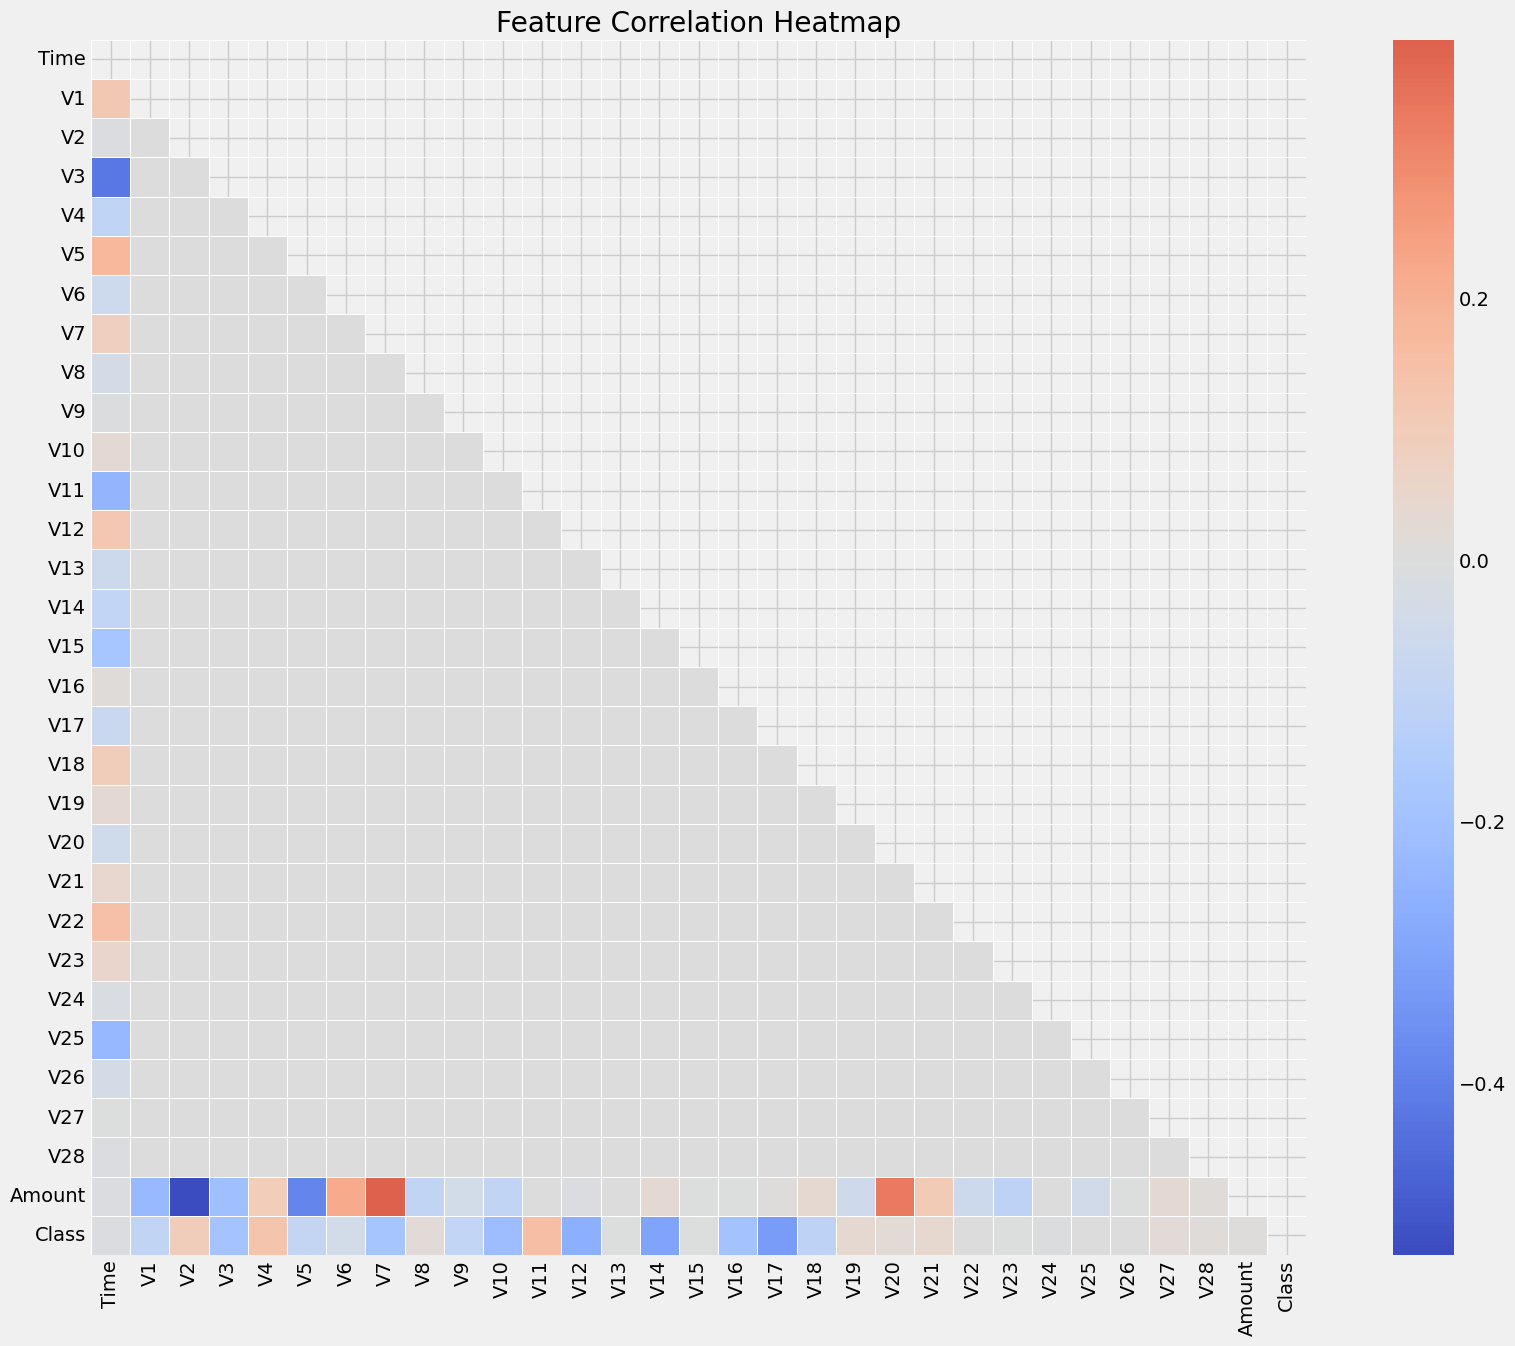

In [11]:
# Correlation heatmap
plt.figure(figsize=(20, 15))
correlation = df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
# Top 10 correlated with Class
print("\nTop 10 Features Correlated with Fraud:")
print(correlation['Class'].sort_values(ascending=False)[1:11])


Top 10 Features Correlated with Fraud:
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64


##### Baseline Modeling

In [13]:
# Feature preparation
X = df.drop('Class', axis=1)
y = df['Class']

In [14]:
# Standardize 'Time' and 'Amount'
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"\nTraining samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
print("Training class distribution:")
print(y_train.value_counts())



Training samples: 227845, Testing samples: 56962
Training class distribution:
Class
0    227451
1       394
Name: count, dtype: int64


In [18]:
# Train Random Forest baseline model
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [19]:
# Evaluate
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred))


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



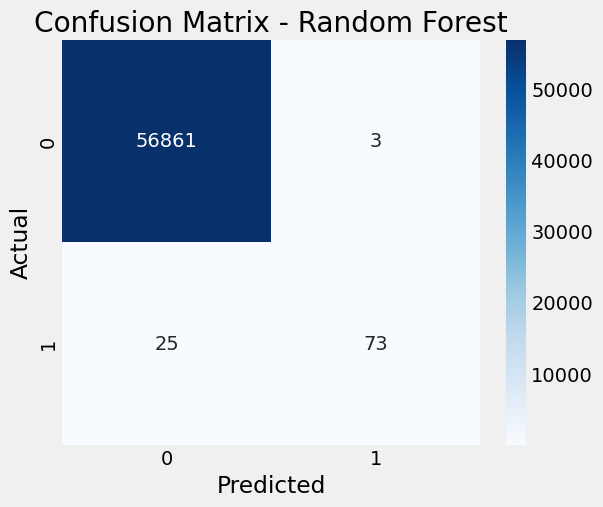

In [20]:
# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

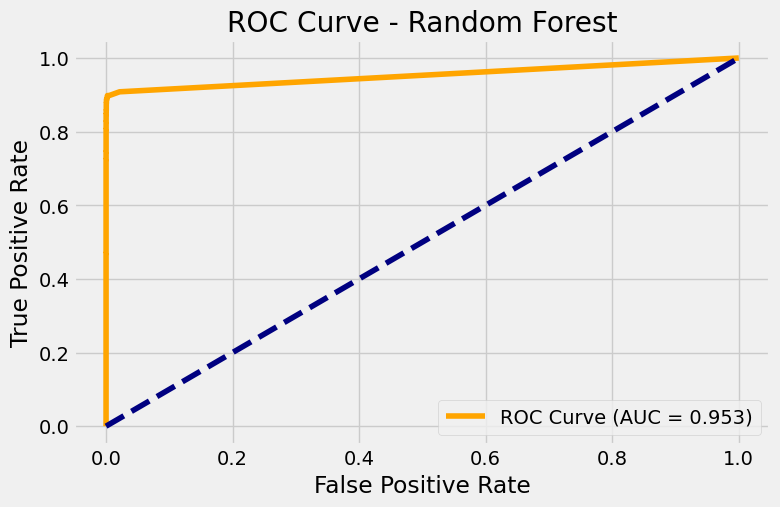

In [21]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


##### Advanced Improvements with SMOTE

In [22]:
# Apply SMOTE to training data only
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("\nAfter SMOTE - Training class distribution:")
print(pd.Series(y_train_sm).value_counts())



After SMOTE - Training class distribution:
Class
0    227451
1    227451
Name: count, dtype: int64


In [23]:
# Train Random Forest again on balanced data
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [24]:
# Predictions
y_pred_sm = rf_smote.predict(X_test)
y_proba_sm = rf_smote.predict_proba(X_test)[:, 1]


In [25]:
# Evaluation
print("\nRandom Forest with SMOTE - Classification Report:")
print(classification_report(y_test, y_pred_sm))



Random Forest with SMOTE - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



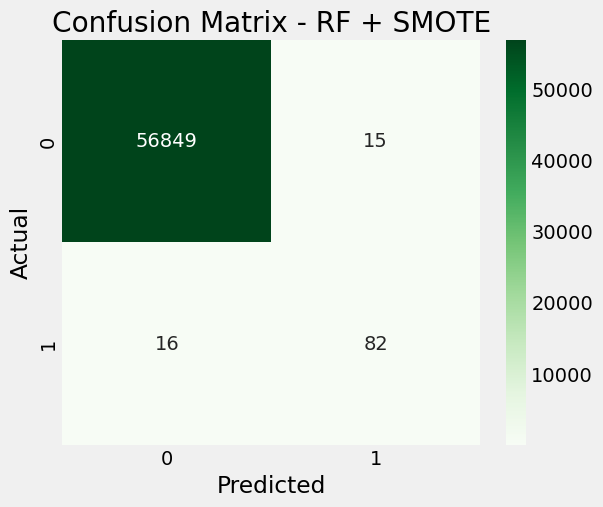

In [26]:
# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_sm), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - RF + SMOTE")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

Accuracy:  0.9731024901519414


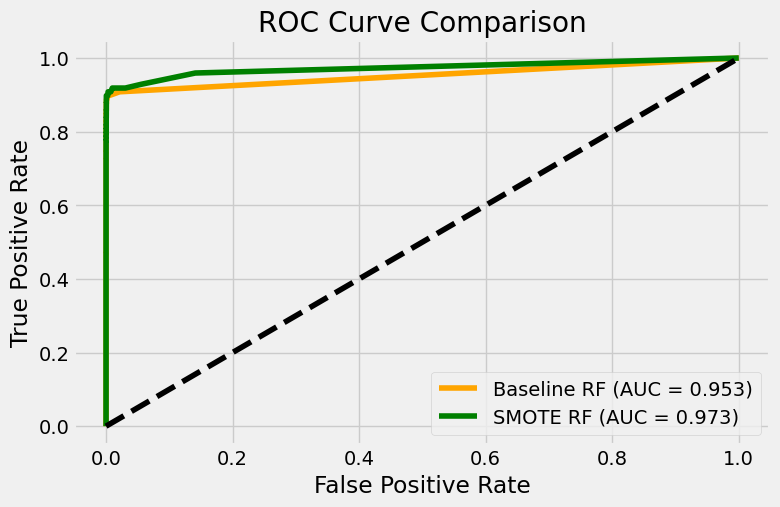

In [32]:
# ROC Curve
fpr_sm, tpr_sm, _ = roc_curve(y_test, y_proba_sm)
roc_auc_sm = auc(fpr_sm, tpr_sm)
print("Accuracy: ",roc_auc_sm)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"Baseline RF (AUC = {roc_auc:.3f})", color='orange')
plt.plot(fpr_sm, tpr_sm, label=f"SMOTE RF (AUC = {roc_auc_sm:.3f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
